# Case study: Ninjacart
**Objective:** This study aims to develope an effective imag classification model capable of accurately identifying and categorizing images of onions, potatoes, tomatoes, and Indian market scenes.

**Methods:** The project employs multiple approaches, including building a custom model from scratch and leveraging transfer learning techniques using pre-trained artitectures sucj as VGG19, ResNet, and MobileNet.
Comprehensive preprocessing steps, including image resizing, normalization, data augmentation, are implimented to enhance the model performance and robustness.

**Expected outcomes:** The goal is to achieve high classification accuracy and minimize misclassificatios, ultimately enabling real-time applications in aggriculture supply chain management and improving th efficiency of visula data processing in indian markets.

In [ ]:
#import libraries
import os
import glob
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
pip install gdown


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Downloading the files
!gdown https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT



Downloading...
From (original): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
From (redirected): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT&confirm=t&uuid=f0db7145-6e32-4e75-a9e6-d808cdb7759f
To: /kaggle/working/ninjacart_data.zip
100%|████████████████████████████████████████| 275M/275M [00:04<00:00, 65.7MB/s]


In [ ]:
#Unzipping the files
!unzip /kaggle/working/ninjacart_data.zip

Archive:  /kaggle/working/ninjacart_data.zip
   creating: ninjacart_data/test/
   creating: ninjacart_data/test/indian market/
  inflating: ninjacart_data/test/indian market/bhl.jpeg  
  inflating: ninjacart_data/test/indian market/bhv.jpeg  
  inflating: ninjacart_data/test/indian market/bn.jpeg  
  inflating: ninjacart_data/test/indian market/hjx.jpeg  
  inflating: ninjacart_data/test/indian market/igis.jpeg  
  inflating: ninjacart_data/test/indian market/in.jpeg  
  inflating: ninjacart_data/test/indian market/india-4898453__340.jpg  
  inflating: ninjacart_data/test/indian market/indianmarket10.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket12.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket13.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket14.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket15.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket18.jpeg  
  inflating: ninjacart_data/test/indian 

# Visualizing our images

/tmp/ipykernel_30/2828705847.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, n)


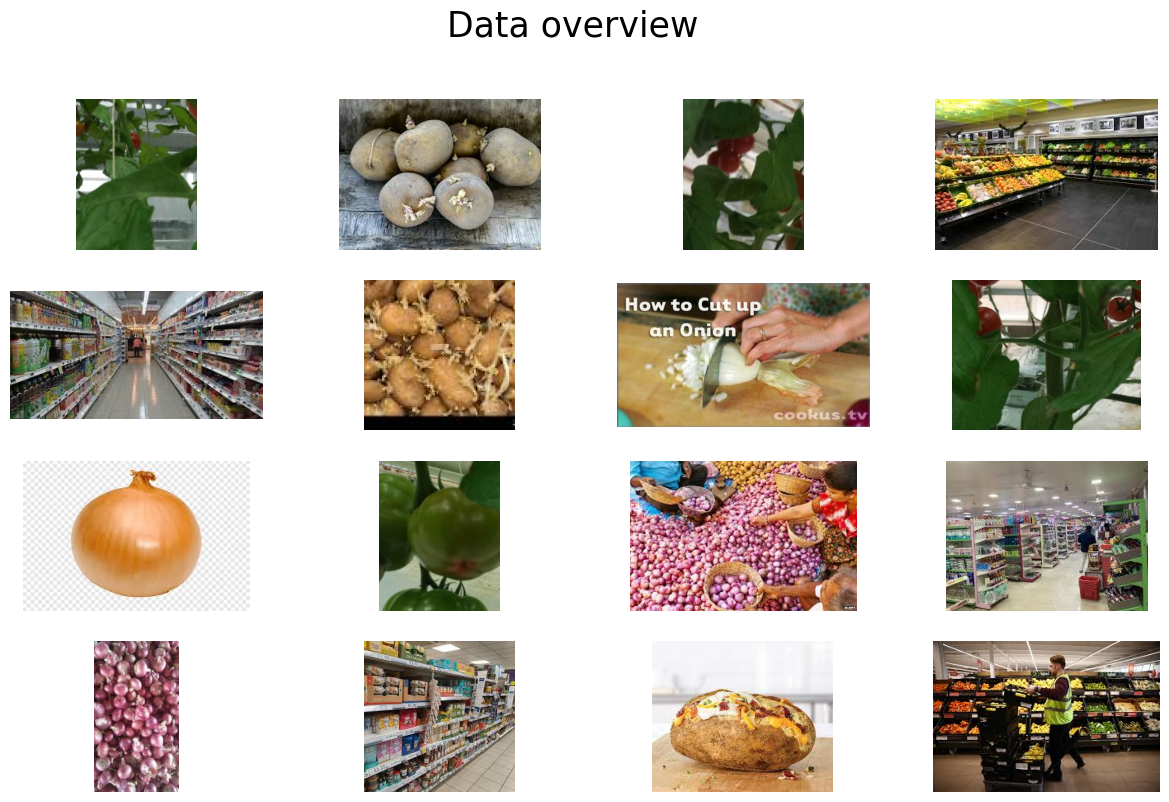

In [ ]:
train_folder = '/kaggle/working/ninjacart_data/train'

images = []
for folder in os.listdir(train_folder):
  for image in os.listdir(train_folder + '/' + folder):
    images.append(os.path.join(train_folder, folder, image))

fig = plt.figure(1, figsize=(15, 9))
fig.suptitle('Data overview', fontsize=25)
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = tf.keras.utils.load_img(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

# Store image arrays & count of each class in train data

In [ ]:
class_dirs = os.listdir("/kaggle/working/ninjacart_data/train") # list all directories inside "train" folder
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)

# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/kaggle/working/ninjacart_data/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

# Store image arrays & count of each class in test data

In [ ]:
class_dirs_test = os.listdir("/kaggle/working/ninjacart_data/test") # list all directories inside "train" folder
image_dict_test = {} # dict to store image array(key) for every class(value)
count_dict_test = {} # dict to store count of files(key) for every class(value)

# iterate over all class_dirs
for cls in class_dirs_test:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/kaggle/working/ninjacart_data/test/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict_test[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict_test[cls] = tf.keras.utils.load_img(image_path)

# Image dimension analysis

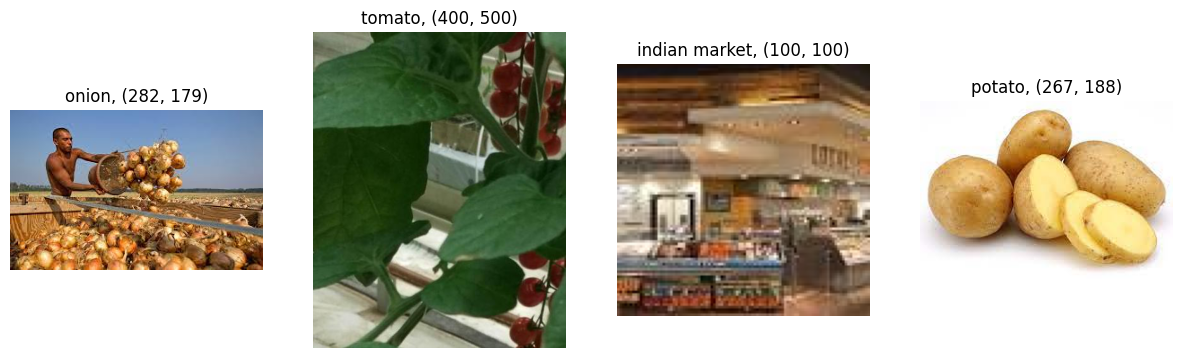

In [ ]:
plt.figure(figsize=(15, 7))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(1, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

# Class Distribution Analysis
- Let's visualize how many samples of each class we have and if there's any class imbalance or not
- Plotting our Class distributions using our image_dict and count_dict which stores the images for each class along with its count
- We also feed our count_dict to a Dataframe to print the count for each class in our training and test directories

**Train data distribution**

Count of training samples per class:
            class  count
0         tomato    789
1         potato    898
2          onion    849
3  indian market    599 



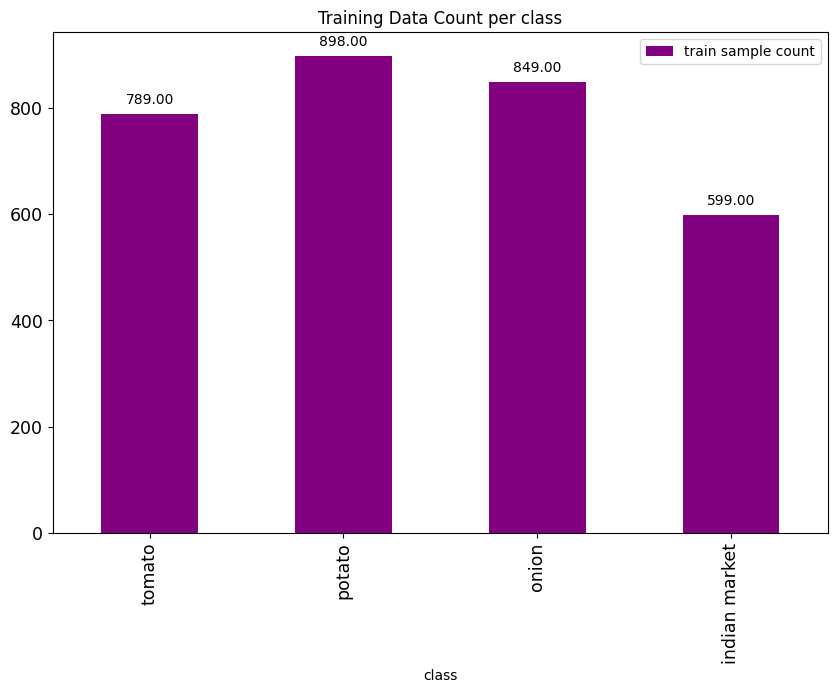

In [ ]:
# Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict.keys(),     # keys of count_dict are class labels
    "count": count_dict.values(),   # value of count_dict contain counts of each class
})

print("Count of training samples per class:\n", df_count_train, "\n")

# draw a bar plot using pandas in-built plotting function
b = df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class", label='train sample count', color='purple', figsize = (10, 6.5), fontsize=12.5)

# Annotate the bars in our plot with their values
for q in b.patches:
    b.annotate(f'{q.get_height():0.2f}', (q.get_x() + q.get_width() / 2., q.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

-- From the above plot,our Data is evenly distributed, but is also not imbalanced, so we are good to go !

**Test data distribution**

Count of testing samples per class:
            class  count
0          onion     83
1         tomato    106
2  indian market     81
3         potato     81 



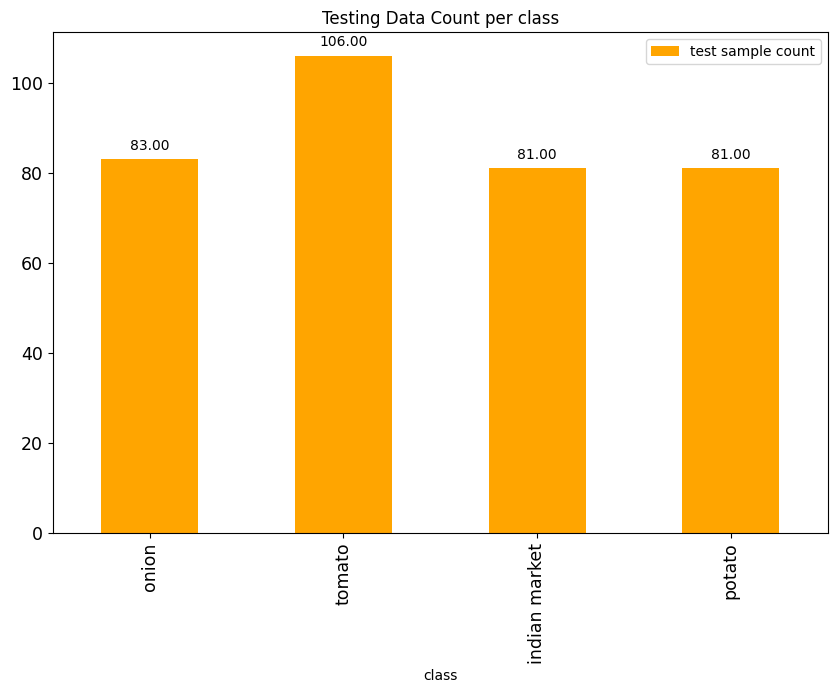

In [ ]:
# Let's now Plot the Data Distribution of Training Data across Classes
df_count_test = pd.DataFrame({
    "class": count_dict_test.keys(),     # keys of count_dict are class labels
    "count": count_dict_test.values(),   # value of count_dict contain counts of each class
})

print("Count of testing samples per class:\n", df_count_test, "\n")

# draw a bar plot using pandas in-built plotting function
a = df_count_test.plot.bar(x='class', y='count', title="Testing Data Count per class", color='orange', label='test sample count', figsize =(10, 6.5), fontsize=12.5)
for p in a.patches:
    a.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

# Mounting data set
Now that we have analyzed and Explored our Raw Data, now to feed our Data into our model,
- Every image needs to be labelled according to its class and converted to a tensor.
- We will split our data into 3 sets : Train, Test and Validation

For this task, we will use `tf.keras.utils.image_dataset_from_directory`, which will :

- Create an **(image, label)** pair for every image
- Automatically label the images using one-hot encoding
  - Eg : An image in the folder *indian market* will be labelled as **[1, 0, 0, 0]**
  - Since we have 4 classes, our classes will be one-hot encoded **alphabetically**,
  - meaning our first class is indian market, fourth will be tomato.

- Batching (Grouping) images together according to *batch_size*
- Resize the Images to the shape ***(256, 256)***
- Seed the shuffling of our images, so that it shuffles in a 'fixed' way

  - which will be used to create our validation data

- Splitting 20% of our training data for validation
- Shuffling the data according to the `seed`

In [ ]:
train_dir = '/kaggle/working/ninjacart_data/train'
test_dir = '/kaggle/working/ninjacart_data/test'

In [ ]:
# Specifying the image size to resize all images
image_size = (256, 256)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 35,
                                                       image_size = image_size,
                                                       seed = 2022,
                                                       validation_split = 0.2,
                                                       subset = "training",
                                                       shuffle=True)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(directory = test_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 35,
                                                       image_size = image_size,
                                                       seed = 2022,
                                                      )

Found 351 files belonging to 4 classes.


In [ ]:
valid_ds = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 35,
                                                       image_size = image_size,
                                                       seed = 2022,
                                                       validation_split = 0.2,
                                                       subset = "validation")

Found 3135 files belonging to 4 classes.
Using 627 files for validation.


In [ ]:
# index           0        1        2         3
class_names = ['noise', 'onion', 'potato', 'tomato']

# Building Custom CNN model
Let's build a baseline CNN Architecture with some Convolutional blocks with MaxPooling

# Defining the model artitecture

In [ ]:
model = tf.keras.Sequential([

tf.keras.layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),

tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
tf.keras.layers.MaxPool2D(pool_size = (2,2)),

tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
tf.keras.layers.MaxPool2D(pool_size = (2,2)),

tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'),

tf.keras.layers.GlobalAveragePooling2D(),
tf.keras.layers.Dense(4, activation = 'softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compiling the model

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
log_dir_1 = "logs/Custom_CNN_overfit"
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir_1, histogram_freq=1)

# Model Training

In [ ]:
history = model.fit(train_ds, epochs=20, validation_data=valid_ds)

Epoch 1/20


I0000 00:00:1730299372.117014     124 service.cc:145] XLA service 0x7ecbfc00bb10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730299372.117082     124 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/72 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.1143 - loss: 1.3889  

I0000 00:00:1730299381.169405     124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 206ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2833 - loss: 1.3733 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4450 - val_loss: 1.3070
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - Precision: 0.4125 - Recall: 0.0313 - accuracy: 0.4627 - loss: 1.2406 - val_Precision: 0.7557 - val_Recall: 0.4785 - val_accuracy: 0.6396 - val_loss: 0.9187
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - Precision: 0.7877 - Recall: 0.5296 - accuracy: 0.6771 - loss: 0.8073 - val_Precision: 0.8068 - val_Recall: 0.6061 - val_accuracy: 0.7002 - val_loss: 0.7237
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - Precision: 0.8107 - Recall: 0.6350 - accuracy: 0.7337 - loss: 0.6855 - val_Precision: 0.8111 - val_Recall: 0.6507 - val_accuracy: 0.7209 - val_loss: 0.6671
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - Precision: 0.8045 - Recall: 0.6553 - accuracy: 0.7347 - loss: 0.6644 - val_Precision: 0.8047 - val_Recal

# Plotting our Model's performance

In [ ]:
def plot_acc_loss(model_history, n_epochs):

  fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
  ax = axes.ravel()

  #accuracy graph
  ax[0].plot(range(0, n_epochs), [acc * 100 for acc in model_history.history['accuracy']], label='Train', color='b')
  ax[0].plot(range(0, n_epochs), [acc * 100 for acc in model_history.history['val_accuracy']], label='Val', color='r')
  ax[0].set_title('Accuracy vs. epoch', fontsize=15)
  ax[0].set_ylabel('Accuracy', fontsize=15)
  ax[0].set_xlabel('epoch', fontsize=15)
  ax[0].legend()

  #loss graph
  ax[1].plot(range(0, n_epochs), model_history.history['loss'], label='Train', color='b')
  ax[1].plot(range(0, n_epochs), model_history.history['val_loss'], label='Val', color='r')
  ax[1].set_title('Loss vs. epoch', fontsize=15)
  ax[1].set_ylabel('Loss', fontsize=15)
  ax[1].set_xlabel('epoch', fontsize=15)
  ax[1].legend()

  #display the graph
  plt.show()

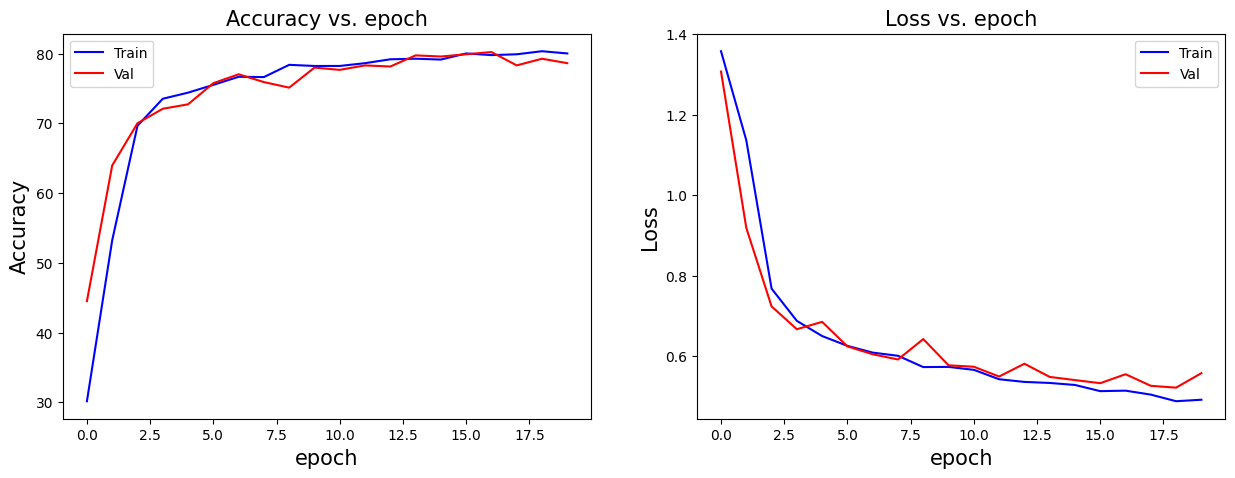

In [ ]:
plot_acc_loss(history, n_epochs = 20)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,822 (1.60 MB)

 Trainable params: 139,940 (546.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 279,882 (1.07 MB)

# Testing our Model
We list all the files in our test directory and append their complete paths to a list *test_images* which we will use to test our model by predicting on on random unseen data

In [ ]:
test_images = []

for folder in os.listdir(test_dir):
  for image in os.listdir(test_dir + '/' + folder):
    test_images.append(os.path.join(test_dir, folder, image))

# Random sample testing
**To test our model on a random sample :**

* Read a random image from test_images list containing paths of all test images
* Resize an image to (256, 256)
* Add an extra dimension to our image's first dimension index
* Predict on the image using model.predict()

In [ ]:
def grid_test_model(model_name):

  fig = plt.figure(1, figsize=(17, 11))
  plt.axis('off')
  n = 0
  for i in range(8):
    n += 1

    img_0 = tf.keras.utils.load_img(random.choice(test_images))
    img_0 = tf.keras.utils.img_to_array(img_0)
    img_0 = tf.image.resize(img_0, (256, 256))
    img_1 = tf.expand_dims(img_0, axis = 0)

    pred = model_name.predict(img_1, verbose =0)
    predicted_label = tf.argmax(pred, 1).numpy().item()

    for item in pred :
      item = tf.round((item*100))

    plt.subplot(2, 4, n)
    plt.axis('off')
    plt.title(f'prediction : {class_names[predicted_label]}\n\n'
              f'{item[0]} % {class_names[0]}\n'
              f'{item[1]} % {class_names[1]}\n'
              f'{item[2]} % {class_names[2]}\n'
              f'{item[3]} % {class_names[3]}\n')
    plt.imshow(img_0/255)
  plt.show()

/tmp/ipykernel_30/1943901840.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, n)


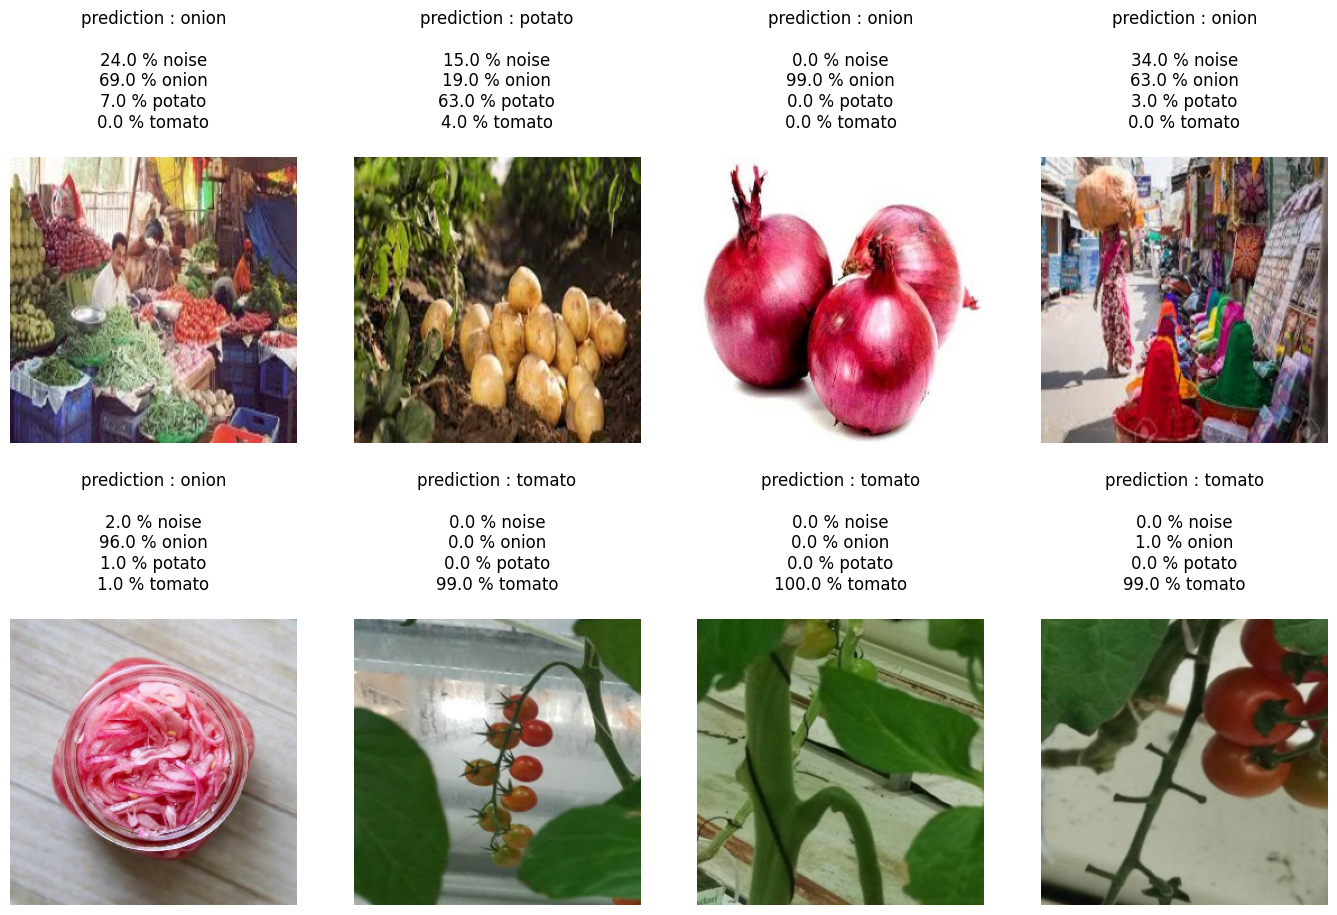

In [ ]:
grid_test_model(model)

# Evaluating accuracy on each class
First we specify paths of each of our test classes

* We define a function classwise_accuracy which calculates accuracy for each class by taking in class path and model,
* We append all the file paths for the input class in a list
* from which we predict on all images and check if the label and predicted label are equal,according to which we calculate the accuracy of our model on the input class

In [ ]:
noise_path = '/kaggle/working/ninjacart_data/test/indian market'
onion_path = '/kaggle/working/ninjacart_data/test/onion'
potato_path = '/kaggle/working/ninjacart_data/test/potato'
tomato_path = '/kaggle/working/ninjacart_data/test/tomato'

In [ ]:
def classwise_accuracy(class_path, class_name, model_name) :
    paths = []
    for i in os.listdir(class_path):
        paths.append(class_path + "/" + str(i))

    correct = 0
    total = 0

    for i in range(len(paths)):
        total+= 1

        img = tf.keras.utils.load_img(paths[i])
        img = tf.keras.utils.img_to_array(img)
        img = tf.image.resize(img, (256, 256))
        img = tf.expand_dims(img, axis = 0)

        pred = model_name.predict(img, verbose = 0)
        if tf.argmax(pred[0]) == class_names.index(f"{class_name}"):
            correct+= 1

    print(f"Accuracy for class {class_name} is {round((correct/total)*100, 2)}% consisting of {len(paths)} images")

In [ ]:
classwise_accuracy(noise_path, 'noise', model)
classwise_accuracy(onion_path, 'onion', model)
classwise_accuracy(potato_path, 'potato', model)
classwise_accuracy(tomato_path, 'tomato', model)

Accuracy for class noise is 53.09% consisting of 81 images
Accuracy for class onion is 57.83% consisting of 83 images
Accuracy for class potato is 76.54% consisting of 81 images
Accuracy for class tomato is 100.0% consisting of 106 images


**Classwise accuracy on train data**

In [ ]:
noise_path_train = '/kaggle/working/ninjacart_data/train/indian market'
onion_path_train = '/kaggle/working/ninjacart_data/train/onion'
potato_path_train = '/kaggle/working/ninjacart_data/train/potato'
tomato_path_train = '/kaggle/working/ninjacart_data/train/tomato'

In [ ]:
classwise_accuracy(noise_path_train, 'noise', model)
classwise_accuracy(onion_path_train, 'onion', model)
classwise_accuracy(potato_path_train, 'potato', model)
classwise_accuracy(tomato_path_train, 'tomato', model)

Accuracy for class noise is 71.12% consisting of 599 images
Accuracy for class onion is 69.49% consisting of 849 images
Accuracy for class potato is 81.96% consisting of 898 images
Accuracy for class tomato is 98.48% consisting of 789 images


# Plotting Confusion Matrix
- We define four empty lists, in which we will store predicted classes by our model for a particular class images
- We define a function `conf_mat` which takes in the path of the class, empty list and the model
- The function reads an image from the given path, resizes it and converts to RGB
- Add an extra dimension at first index of the image and predict on the image with the input model
- Check which class the model has predicted the image belongs to and
- append +1 to the index of the class
  - Eg : If the model predicts that the image belongs to class tomato
  - we will append +1 at the fourth index(3) of our list like [0, 0, 0, 1]
- After calculating the value in our 4 lists for each class,
<br>we combine them, which gives us the confusion matrix of our model and plot them with seaborn

In [ ]:
noise, tomato, potato, onion = 0, 0, 0, 0

l1 = []
l2 = []
l3 = []
l4 = []

In [ ]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(font_scale=1.2)

In [ ]:
def conf_mat(class_path, pred_list, model_name) :
    noise, tomato, potato, onion = 0, 0, 0, 0
    for i in os.listdir(class_path):

        img = tf.keras.utils.load_img(class_path + "/" + str(i))
        img = tf.keras.utils.img_to_array(img)
        img = tf.image.resize(img, (256, 256))
        img = tf.expand_dims(img, axis = 0)

        pred = model_name.predict(img, verbose = 0)
        predicted = tf.argmax(pred, 1).numpy().item()

        if predicted == 0:
            noise+= 1
        elif predicted == 1:
            onion+= 1
        elif predicted == 2:
            potato+= 1
        else:
            tomato+= 1


    for item in noise, onion, potato, tomato :
        pred_list.append(item)

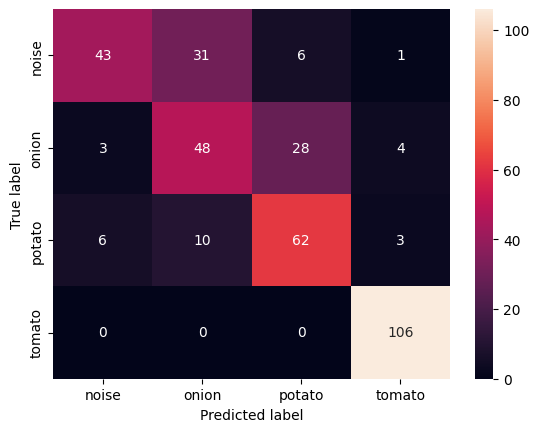

In [ ]:
conf_mat(noise_path, l1, model)
conf_mat(onion_path, l2, model)
conf_mat(potato_path, l3, model)
conf_mat(tomato_path, l4, model)

ax = sns.heatmap([l1, l2, l3, l4], xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g')
ax.set(xlabel='Predicted label', ylabel='True label')
plt.show()

In [ ]:
#Evaluation metrics results on Test data
result = model.evaluate(test_ds)
dict(zip(model.metrics_names, result))


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - Precision: 0.7786 - Recall: 0.6992 - accuracy: 0.7374 - loss: 0.5887


{'loss': 0.5519102811813354, 'compile_metrics': 0.7350427508354187}

In [ ]:
#Evaluation metrics results on Train data
result = model.evaluate(train_ds)
dict(zip(model.metrics_names, result))

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - Precision: 0.8658 - Recall: 0.7585 - accuracy: 0.8187 - loss: 0.4865


{'loss': 0.49312010407447815, 'compile_metrics': 0.8082137107849121}

--From the above results, test accuracy of custom CNN is around 73% and train accuracy is around 81%.

# Model Tuning - Overfitting
**Adding btch Normalization and Drop out to our artitecture, which will help in improving its generalization**

We add `Dropout()` and `BatchNormalization()` to our model architecture, which will help in improving its generalization
<br><br>
How do they help ?
- `Dropout()` : Drops out random neurons while training which forces the model to focus on every feature for prediction

- `BatchNormalization()` : Normalizes the inputs from previous layer for every mini-batch before sending it to the next layer.
<br>Help in mantaining the distribution of our data by making it a normal distribution (mean = 0, std. = 1)

In [ ]:
model_revamp = tf.keras.Sequential([

tf.keras.layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),

tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPool2D(pool_size = (2,2)),

tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPool2D(pool_size = (2,2)),

tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.GlobalAveragePooling2D(),
tf.keras.layers.Dropout(rate = 0.2),

tf.keras.layers.Dense(4, activation = 'softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_revamp.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
                    loss = tf.keras.losses.CategoricalCrossentropy(),
                    metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
log_dir_2 = "logs/Custom_CNN_revamp"

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = log_dir_2, histogram_freq = 1)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("CNN_best.keras", save_best_only = True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights = True
)

# Training our Tuned model

In [ ]:
history_0 = model_revamp.fit(
train_ds,
epochs=20,
validation_data = valid_ds,
callbacks=[tensorboard_cb, checkpoint_cb, early_stopping_cb])

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - Precision: 0.7660 - Recall: 0.4674 - accuracy: 0.6433 - loss: 0.8542 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.2297 - val_loss: 1.3984
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - Precision: 0.8640 - Recall: 0.7694 - accuracy: 0.8171 - loss: 0.5000 - val_Precision: 0.4286 - val_Recall: 0.2297 - val_accuracy: 0.2297 - val_loss: 1.5392
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - Precision: 0.8647 - Recall: 0.7783 - accuracy: 0.8237 - loss: 0.4531 - val_Precision: 0.2478 - val_Recall: 0.2297 - val_accuracy: 0.2297 - val_loss: 1.6394
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - Precision: 0.8766 - Recall: 0.8108 - accuracy: 0.8475 - loss: 0.4059 - val_Precision: 0.2428 - val_Recall: 0.2297 - val_accuracy: 0.2329 - val_loss: 1.7544
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - Precision: 0.8794 - Recall: 0.8280 - accuracy: 0.8548 - loss: 0.3900 - val_Precision: 0.3348 - val_Re

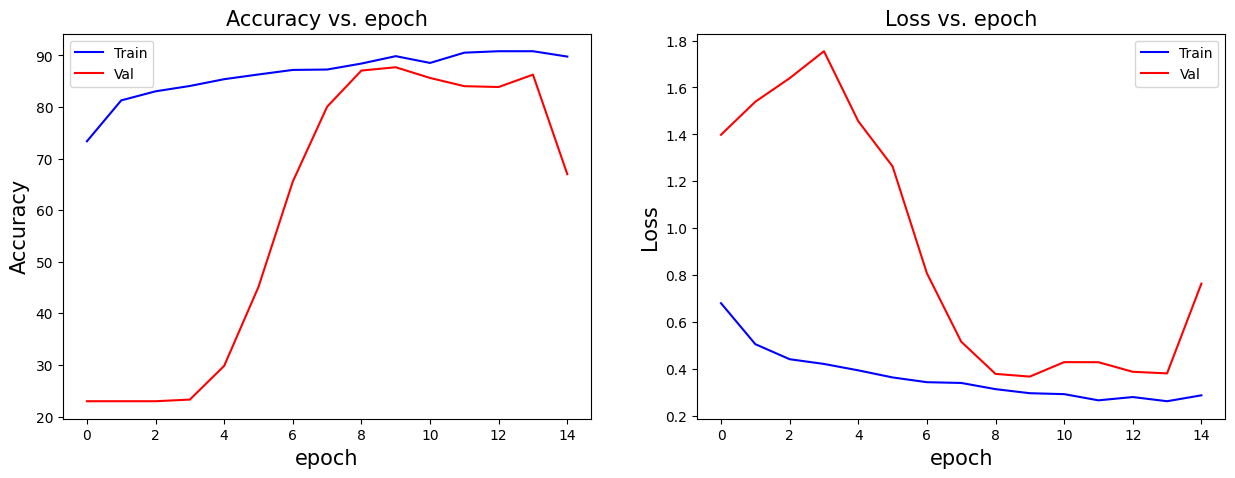

In [ ]:
plot_acc_loss(history_0, n_epochs = 15)

In [ ]:
#Evaluation metrics resilts on Test data
result = model_revamp.evaluate(test_ds)
dict(zip(model_revamp.metrics_names, result))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - Precision: 0.8745 - Recall: 0.8066 - accuracy: 0.8551 - loss: 0.4050


{'loss': 0.40812161564826965, 'compile_metrics': 0.8433048725128174}

We observe an accuracy jump of **~11 %** by just :
Adding Dropout and BatchNormalization
Implementing callbacks during training

In [ ]:
#Evaluation metrics resilts on Train data
result = model_revamp.evaluate(train_ds)
dict(zip(model_revamp.metrics_names, result))

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - Precision: 0.9227 - Recall: 0.8715 - accuracy: 0.9079 - loss: 0.2906


{'loss': 0.291349321603775, 'compile_metrics': 0.9047049283981323}

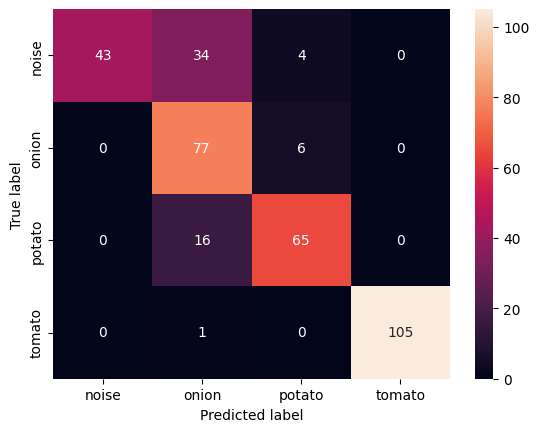

In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []

conf_mat(noise_path, l1, model_revamp)
conf_mat(onion_path, l2, model_revamp)
conf_mat(potato_path, l3, model_revamp)
conf_mat(tomato_path, l4, model_revamp)

ax = sns.heatmap([l1, l2, l3, l4], xticklabels = class_names, yticklabels = class_names, annot = True, fmt = 'g')
ax.set(xlabel = 'Predicted label', ylabel = 'True label')
plt.show()

In the Confusion matrix plotted above, we can observe that :

- Our model can easily differentiate between all classes with minimal error
- Potato and onion are the most confusing classes for our model
- Tomato can be easily differentiated with the smallest error

# Classwise accuracy

Classwise accuracy on test data

In [ ]:
classwise_accuracy(noise_path, 'noise', model_revamp)
classwise_accuracy(onion_path, 'onion', model_revamp)
classwise_accuracy(potato_path, 'potato', model_revamp)
classwise_accuracy(tomato_path, 'tomato', model_revamp)

Accuracy for class noise is 53.09% consisting of 81 images
Accuracy for class onion is 92.77% consisting of 83 images
Accuracy for class potato is 80.25% consisting of 81 images
Accuracy for class tomato is 99.06% consisting of 106 images


Classwise accuracy on train data

In [ ]:
classwise_accuracy(noise_path_train, 'noise', model_revamp)
classwise_accuracy(onion_path_train, 'onion', model_revamp)
classwise_accuracy(potato_path_train, 'potato', model_revamp)
classwise_accuracy(tomato_path_train, 'tomato', model_revamp)

Accuracy for class noise is 79.47% consisting of 599 images
Accuracy for class onion is 91.99% consisting of 849 images
Accuracy for class potato is 85.63% consisting of 898 images
Accuracy for class tomato is 99.75% consisting of 789 images


# Applying Transfer Learning

**Model, we are using are**
* VGG19
* ResNet
* MobileNet

**Note:** These models are also trained on dataset which is augmeneted and found how it impacts model's performance. Data augmentation is done in ResNet section ,but applied for all three models.

# VGG19

In [ ]:
# load base model
base_model_3 = tf.keras.applications.vgg19.VGG19(input_shape=(256, 256, 3), include_top = False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# append classification layer
model_3 = base_model_3.output

model_3 = tf.keras.Sequential([
            #Normalizing 0-255 into 0 to 1
            tf.keras.layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
            base_model_3,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dropout(rate = 0.1),
            tf.keras.layers.Dense(4, activation = 'softmax')
        ])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
log_dir_5 = "logs/VGG19"

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir_5, histogram_freq=1)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("VGG19.keras", save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights=True
)

In [ ]:
history_3 = model_3.fit(train_ds, validation_data = valid_ds, epochs = 20, callbacks=[tensorboard_cb, checkpoint_cb, early_stopping_cb])

Epoch 1/20


I0000 00:00:1730771997.458470     112 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_12', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_11', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 4 bytes spill stores, 12 bytes spill loads



71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - Precision: 0.6957 - Recall: 0.3616 - accuracy: 0.5499 - loss: 1.0191

I0000 00:00:1730772042.356174     110 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_12', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_10', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_11', 4 bytes spill stores, 12 bytes spill loads



72/72 ━━━━━━━━━━━━━━━━━━━━ 94s 874ms/step - Precision: 0.6986 - Recall: 0.3679 - accuracy: 0.5541 - loss: 1.0111 - val_Precision: 0.7696 - val_Recall: 0.7352 - val_accuracy: 0.7560 - val_loss: 0.8088
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 32s 440ms/step - Precision: 0.8562 - Recall: 0.8107 - accuracy: 0.8397 - loss: 0.4541 - val_Precision: 0.9259 - val_Recall: 0.9171 - val_accuracy: 0.9234 - val_loss: 0.2638
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 31s 426ms/step - Precision: 0.9309 - Recall: 0.9161 - accuracy: 0.9250 - loss: 0.2202 - val_Precision: 0.9089 - val_Recall: 0.9075 - val_accuracy: 0.9075 - val_loss: 0.3565
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 31s 426ms/step - Precision: 0.9327 - Recall: 0.9170 - accuracy: 0.9273 - loss: 0.2364 - val_Precision: 0.9263 - val_Recall: 0.9219 - val_accuracy: 0.9219 - val_loss: 0.3039
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 31s 426ms/step - Precision: 0.9508 - Recall: 0.9392 - accuracy: 0.9446 - loss: 0.1451 - val_Precision: 0.9147 - val_Recall: 0.905

# Evaluating VGG19

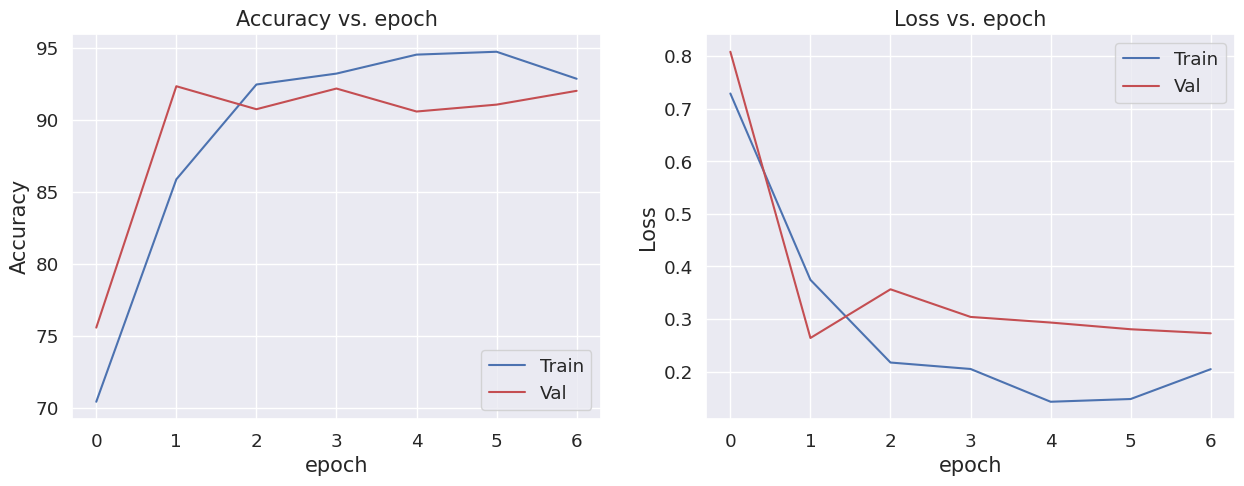

In [ ]:
plot_acc_loss(history_3, n_epochs = 7)

In [ ]:
classwise_accuracy(noise_path, 'noise', model_3)
classwise_accuracy(onion_path, 'onion', model_3)
classwise_accuracy(potato_path, 'potato', model_3)
classwise_accuracy(tomato_path, 'tomato', model_3)

Accuracy for class noise is 82.72% consisting of 81 images
Accuracy for class onion is 90.36% consisting of 83 images
Accuracy for class potato is 91.36% consisting of 81 images
Accuracy for class tomato is 100.0% consisting of 106 images


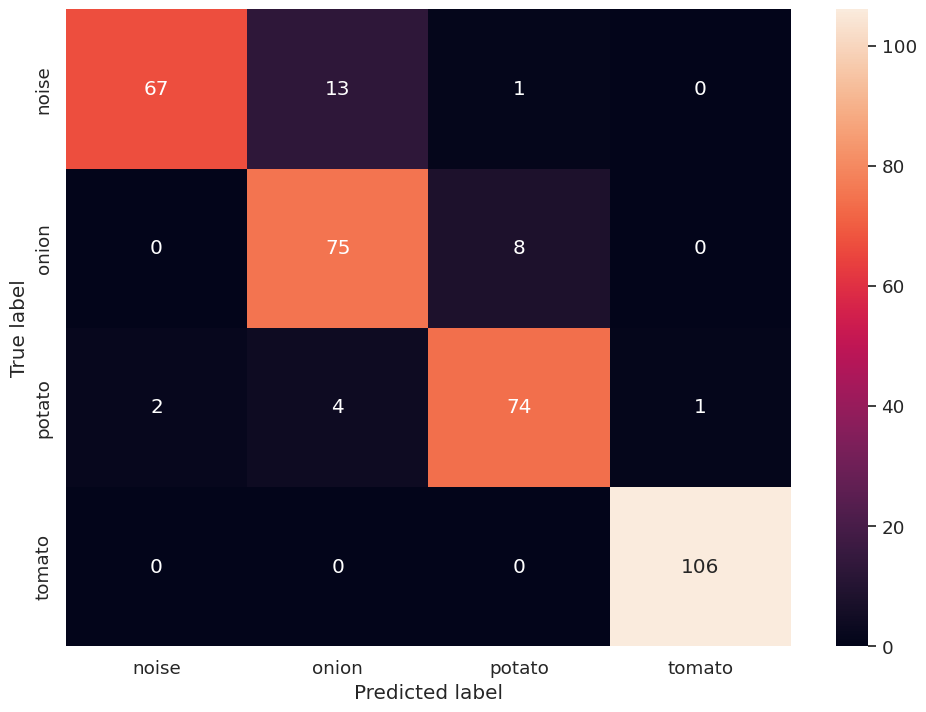

In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []

conf_mat(noise_path, l1, model_3)
conf_mat(onion_path, l2, model_3)
conf_mat(potato_path, l3, model_3)
conf_mat(tomato_path, l4, model_3)

ax = sns.heatmap([l1, l2, l3, l4], xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g')
ax.set(xlabel='Predicted label', ylabel='True label')
plt.show()

In [ ]:
result = model_3.evaluate(test_ds)
dict(zip(model_3.metrics_names, result))

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - Precision: 0.9322 - Recall: 0.9250 - accuracy: 0.9250 - loss: 0.2477


{'loss': 0.27434617280960083, 'compile_metrics': 0.9116809368133545}

In [ ]:
result = model_3.evaluate(train_ds)
dict(zip(model_3.metrics_names, result))

72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - Precision: 0.9387 - Recall: 0.9273 - accuracy: 0.9318 - loss: 0.1828


{'loss': 0.1727445423603058, 'compile_metrics': 0.9405900835990906}

--Comparing accuracy of VGG19 with the accuracy of custom model, accuracy of VGG19 is **7%** higher than that of custom model

# Training VGG19 model on augmented data set

In [ ]:
history_3 = model_3.fit(aug_ds, validation_data = valid_ds, epochs = 20, callbacks=[tensorboard_cb, checkpoint_cb, early_stopping_cb])

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 59s 811ms/step - Precision: 0.8706 - Recall: 0.8203 - accuracy: 0.8484 - loss: 0.4018 - val_Precision: 0.9243 - val_Recall: 0.8963 - val_accuracy: 0.9107 - val_loss: 0.3073
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 59s 810ms/step - Precision: 0.9264 - Recall: 0.9033 - accuracy: 0.9161 - loss: 0.2471 - val_Precision: 0.8955 - val_Recall: 0.8884 - val_accuracy: 0.8931 - val_loss: 0.3137
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 58s 805ms/step - Precision: 0.9279 - Recall: 0.9135 - accuracy: 0.9212 - loss: 0.2250 - val_Precision: 0.9114 - val_Recall: 0.9027 - val_accuracy: 0.9059 - val_loss: 0.3287
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 60s 831ms/step - Precision: 0.9183 - Recall: 0.9021 - accuracy: 0.9121 - loss: 0.2497 - val_Precision: 0.9296 - val_Recall: 0.9266 - val_accuracy: 0.9266 - val_loss: 0.2523
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 58s 799ms/step - Precision: 0.9344 - Recall: 0.9248 - accuracy: 0.9307 - loss: 0.1891 - val_Precision: 0.9494 - val_Re

In [ ]:
result = model_3.evaluate(aug_ds)
dict(zip(model_3.metrics_names, result))

72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 585ms/step - Precision: 0.9076 - Recall: 0.8689 - accuracy: 0.8826 - loss: 0.2964


{'loss': 0.2789037227630615, 'compile_metrics': 0.8923444747924805}

In [ ]:
result = model_3.evaluate(test_ds)
dict(zip(model_3.metrics_names, result))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - Precision: 0.8848 - Recall: 0.8461 - accuracy: 0.8535 - loss: 0.4576


{'loss': 0.4202220141887665, 'compile_metrics': 0.8575498461723328}

--After training the model on augmented images, test accuracy has been reduced, its almost same as accuracy of modelrevamp.But now, model is not overfitted.

# ResNet

In [ ]:
# load base model
base_model_1 = tf.keras.applications.resnet50.ResNet50(input_shape=(256, 256, 3), include_top = False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# append classification layer
model_1 = base_model_1.output

model_1 = tf.keras.Sequential([
            #Normalizing 0-255 into 0 to 1
            tf.keras.layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
            base_model_1,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dropout(rate = 0.1),
            tf.keras.layers.Dense(4, activation = 'softmax')
        ])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
log_dir_3 = "logs/ResNet"

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir_3, histogram_freq=1)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ResNet.keras", save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights=True
)

# Training ResNet model

In [ ]:
history_1 = model_1.fit(train_ds, validation_data = valid_ds, epochs = 20, callbacks=[tensorboard_cb, checkpoint_cb, early_stopping_cb])

Epoch 1/20


I0000 00:00:1730770711.292940     113 service.cc:145] XLA service 0x7ce684003080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730770711.293017     113 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1730770740.085581     113 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_12', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_11', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_10', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_8', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_

71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - Precision: 0.9136 - Recall: 0.8167 - accuracy: 0.8641 - loss: 0.3604

I0000 00:00:1730770778.989928     111 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_12', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_11', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_10', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads



72/72 ━━━━━━━━━━━━━━━━━━━━ 114s 738ms/step - Precision: 0.9149 - Recall: 0.8198 - accuracy: 0.8662 - loss: 0.3550 - val_Precision: 0.2121 - val_Recall: 0.2121 - val_accuracy: 0.2121 - val_loss: 4.1889
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - Precision: 0.9920 - Recall: 0.9918 - accuracy: 0.9920 - loss: 0.0345 - val_Precision: 0.2121 - val_Recall: 0.2121 - val_accuracy: 0.2121 - val_loss: 3.1106
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - Precision: 0.9970 - Recall: 0.9961 - accuracy: 0.9964 - loss: 0.0101 - val_Precision: 0.2823 - val_Recall: 0.2823 - val_accuracy: 0.2823 - val_loss: 6.6838
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - Precision: 0.9988 - Recall: 0.9984 - accuracy: 0.9985 - loss: 0.0118 - val_Precision: 0.2906 - val_Recall: 0.2855 - val_accuracy: 0.2919 - val_loss: 3.9394
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - Precision: 1.0000 - Recall: 0.9998 - accuracy: 1.0000 - loss: 0.0046 - val_Precision: 0.3173 - val_Recall: 0.27

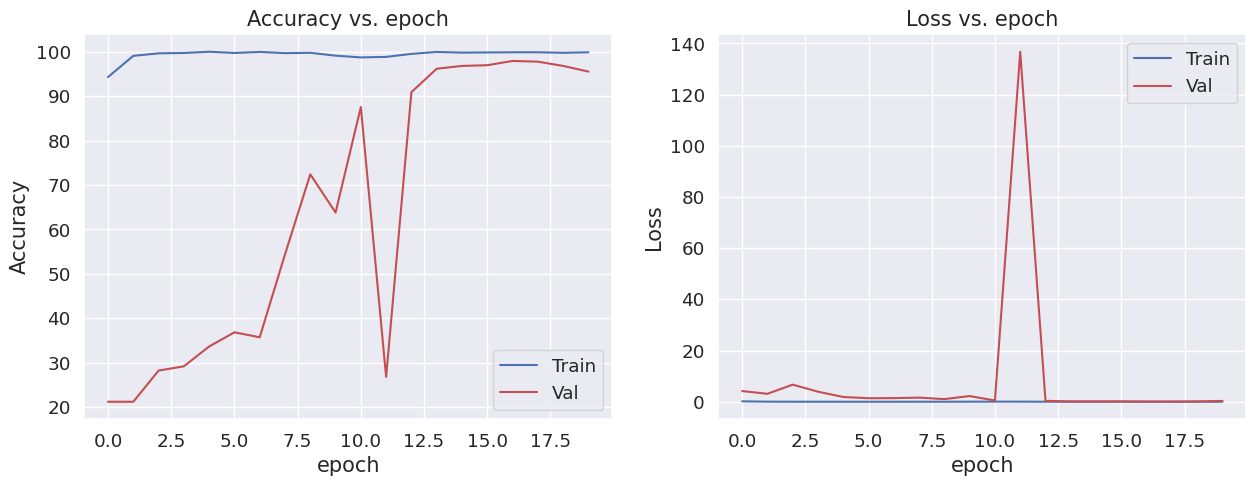

In [ ]:
plot_acc_loss(history_1, n_epochs = 20)

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,681,486 (269.63 MB)

 Trainable params: 23,542,788 (89.81 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,085,578 (179.62 MB)

In [ ]:
classwise_accuracy(noise_path, 'noise', model_1)
classwise_accuracy(onion_path, 'onion', model_1)
classwise_accuracy(potato_path, 'potato', model_1)
classwise_accuracy(tomato_path, 'tomato', model_1)

Accuracy for class noise is 85.19% consisting of 81 images
Accuracy for class onion is 98.8% consisting of 83 images
Accuracy for class potato is 85.19% consisting of 81 images
Accuracy for class tomato is 100.0% consisting of 106 images


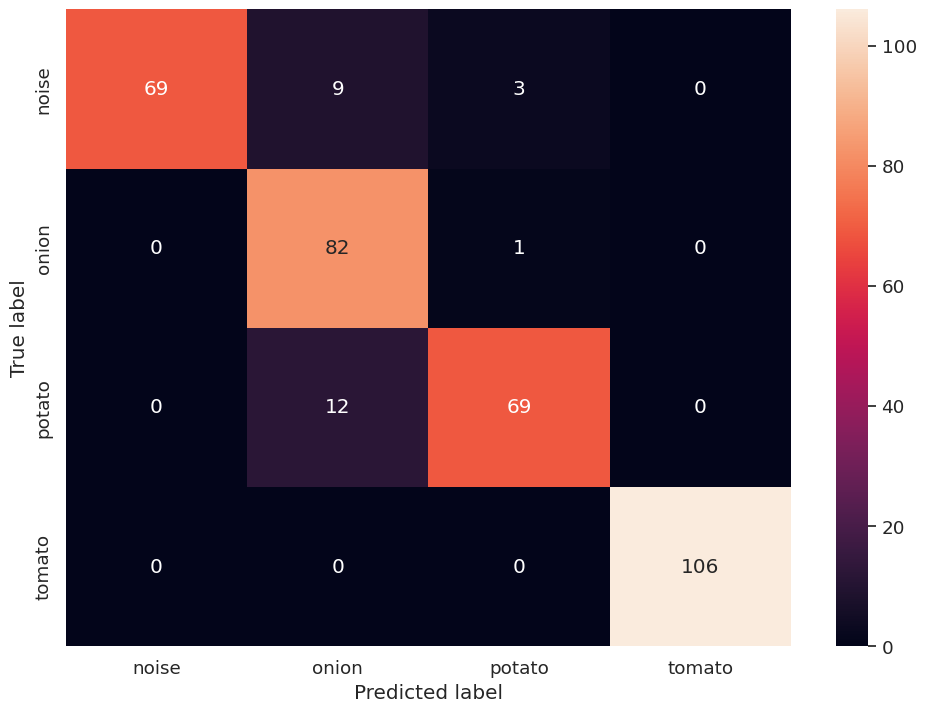

In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []

conf_mat(noise_path, l1, model_1)
conf_mat(onion_path, l2, model_1)
conf_mat(potato_path, l3, model_1)
conf_mat(tomato_path, l4, model_1)

ax = sns.heatmap([l1, l2, l3, l4], xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g')
ax.set(xlabel='Predicted label', ylabel='True label')
plt.show()

In [ ]:
result = model_1.evaluate(test_ds)
dict(zip(model_1.metrics_names, result))

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - Precision: 0.9411 - Recall: 0.9396 - accuracy: 0.9396 - loss: 0.2130


{'loss': 0.25120410323143005, 'compile_metrics': 0.9316239356994629}

In [ ]:
result = model_1.evaluate(train_ds)
dict(zip(model_1.metrics_names, result))

72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - Precision: 0.9995 - Recall: 0.9995 - accuracy: 0.9995 - loss: 0.0018


{'loss': 0.0013750094221904874, 'compile_metrics': 0.9996013045310974}

# Applying Image augmenation

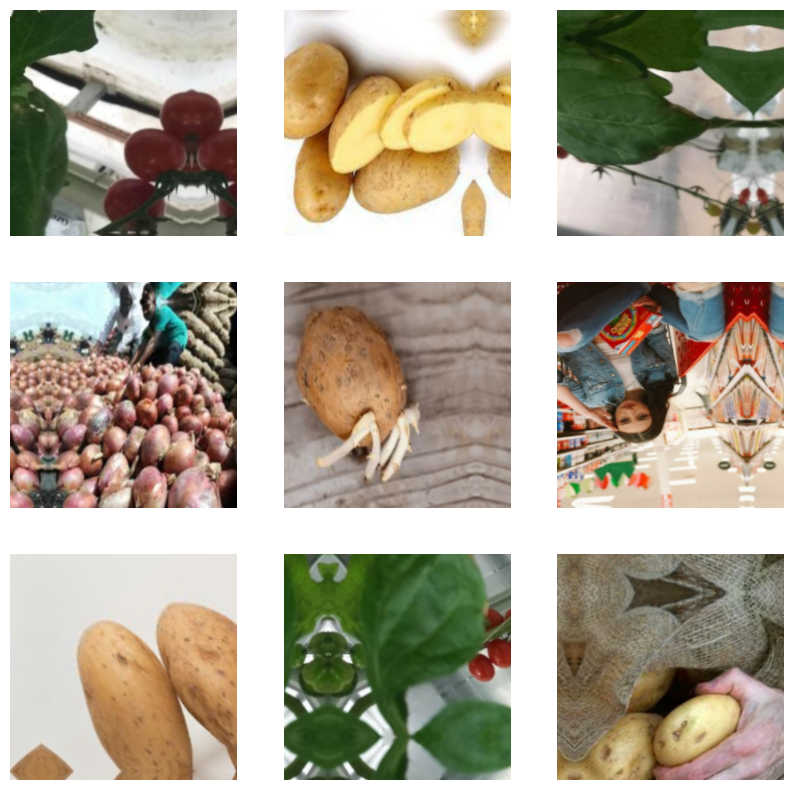

In [ ]:
# Define the augmentation model
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
])

# Assuming train_ds is your original dataset of images
# Example: train_ds = ... (Load your dataset here)

def augment(image, label):
    image = data_augmentation(image)  # Apply the augmentation
    return image, label

# Apply the augmentation using map
aug_ds = train_ds.map(augment)

# Visualize some augmented images
plt.figure(figsize=(10, 10))
for images, _ in aug_ds.take(1):  # Get a single batch
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert to NumPy for visualization
        plt.axis("off")
plt.show()



# Training the ResNet model on augmnted data set

In [ ]:
history_1 = model_1.fit(aug_ds, validation_data = valid_ds, epochs = 20, callbacks=[tensorboard_cb, checkpoint_cb, early_stopping_cb])

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 51s 698ms/step - Precision: 0.9616 - Recall: 0.9561 - accuracy: 0.9589 - loss: 0.1280 - val_Precision: 0.7292 - val_Recall: 0.7257 - val_accuracy: 0.7257 - val_loss: 2.7539
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 48s 665ms/step - Precision: 0.9759 - Recall: 0.9688 - accuracy: 0.9699 - loss: 0.0771 - val_Precision: 0.9330 - val_Recall: 0.9330 - val_accuracy: 0.9330 - val_loss: 0.4334
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 53s 727ms/step - Precision: 0.9798 - Recall: 0.9783 - accuracy: 0.9785 - loss: 0.0589 - val_Precision: 0.9569 - val_Recall: 0.9553 - val_accuracy: 0.9553 - val_loss: 0.2307
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 53s 734ms/step - Precision: 0.9849 - Recall: 0.9827 - accuracy: 0.9827 - loss: 0.0587 - val_Precision: 0.9808 - val_Recall: 0.9793 - val_accuracy: 0.9793 - val_loss: 0.0751
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 49s 683ms/step - Precision: 0.9902 - Recall: 0.9894 - accuracy: 0.9898 - loss: 0.0371 - val_Precision: 0.9697 - val_Re

In [ ]:
result = model_1.evaluate(aug_ds)
dict(zip(model_1.metrics_names, result))

72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 532ms/step - Precision: 0.9875 - Recall: 0.9826 - accuracy: 0.9858 - loss: 0.0484


{'loss': 0.043717626482248306, 'compile_metrics': 0.9856459498405457}

In [ ]:
result = model_1.evaluate(test_ds)
dict(zip(model_1.metrics_names, result))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - Precision: 0.9451 - Recall: 0.9391 - accuracy: 0.9416 - loss: 0.1474


{'loss': 0.15139158070087433, 'compile_metrics': 0.9487179517745972}

--Accuracy of the ResNet model is around **9%** higher than that of VGG19 model.

In [ ]:
classwise_accuracy(noise_path, 'noise', model_1)
classwise_accuracy(onion_path, 'onion', model_1)
classwise_accuracy(potato_path, 'potato', model_1)
classwise_accuracy(tomato_path, 'tomato', model_1)

Accuracy for class noise is 95.06% consisting of 81 images
Accuracy for class onion is 98.8% consisting of 83 images
Accuracy for class potato is 83.95% consisting of 81 images
Accuracy for class tomato is 100.0% consisting of 106 images


# MobileNet

In [ ]:
# load base model
base_model_2 = tf.keras.applications.mobilenet.MobileNet(input_shape=(256, 256, 3), include_top = False)

/tmp/ipykernel_30/1460427381.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_2 = tf.keras.applications.mobilenet.MobileNet(input_shape=(256, 256, 3), include_top = False)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# append classification layer
model_2 = base_model_2.output

model_2 = tf.keras.Sequential([
            #Normalizing 0-255 into 0 to 1
            tf.keras.layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
            base_model_2,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dropout(rate = 0.1),
            tf.keras.layers.Dense(4, activation = 'softmax')
        ])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
log_dir_4 = "logs/MobileNet"

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir_4, histogram_freq=1)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("MobileNet.keras", save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights=True
)

In [ ]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy', 'Precision', 'Recall'])

# Training MobileNet model

In [ ]:
history_2 = model_2.fit(train_ds, validation_data = valid_ds, epochs = 20, callbacks=[tensorboard_cb, checkpoint_cb, early_stopping_cb])

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 49s 341ms/step - Precision: 0.8427 - Recall: 0.7519 - accuracy: 0.7960 - loss: 0.5383 - val_Precision: 0.8901 - val_Recall: 0.8788 - val_accuracy: 0.8836 - val_loss: 0.3393
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - Precision: 0.9900 - Recall: 0.9900 - accuracy: 0.9900 - loss: 0.0353 - val_Precision: 0.9712 - val_Recall: 0.9697 - val_accuracy: 0.9697 - val_loss: 0.0944
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - Precision: 0.9959 - Recall: 0.9945 - accuracy: 0.9949 - loss: 0.0168 - val_Precision: 0.9712 - val_Recall: 0.9681 - val_accuracy: 0.9713 - val_loss: 0.0776
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - Precision: 0.9990 - Recall: 0.9990 - accuracy: 0.9990 - loss: 0.0085 - val_Precision: 0.9744 - val_Recall: 0.9729 - val_accuracy: 0.9729 - val_loss: 0.0690
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - Precision: 0.9989 - Recall: 0.9980 - accuracy: 0.9983 - loss: 0.0082 - val_Precision: 0.9777 - val_Recall

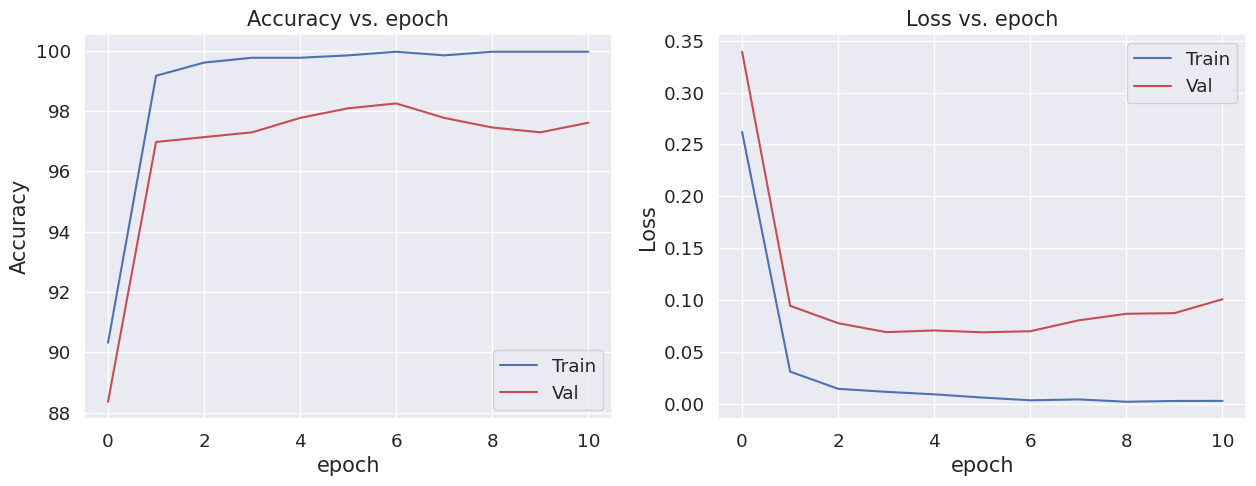

In [ ]:
plot_acc_loss(history_2, n_epochs = 11)

In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 8, 8, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,655,118 (36.83 MB)

 Trainable params: 3,211,076 (12.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 6,422,154 (24.50 MB)

In [ ]:
classwise_accuracy(noise_path, 'noise', model_2)
classwise_accuracy(onion_path, 'onion', model_2)
classwise_accuracy(potato_path, 'potato', model_2)
classwise_accuracy(tomato_path, 'tomato', model_2)

Accuracy for class noise is 83.95% consisting of 81 images
Accuracy for class onion is 97.59% consisting of 83 images
Accuracy for class potato is 82.72% consisting of 81 images
Accuracy for class tomato is 100.0% consisting of 106 images


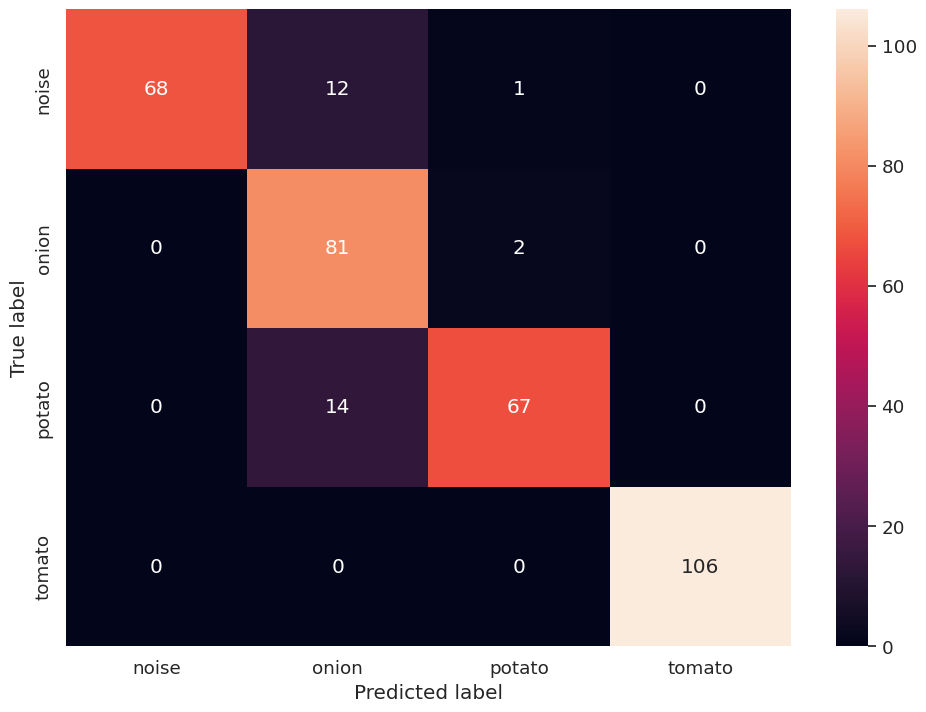

In [ ]:
l1 = []
l2 = []
l3 = []
l4 = []

conf_mat(noise_path, l1, model_2)
conf_mat(onion_path, l2, model_2)
conf_mat(potato_path, l3, model_2)
conf_mat(tomato_path, l4, model_2)

ax = sns.heatmap([l1, l2, l3, l4], xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g')
ax.set(xlabel='Predicted label', ylabel='True label')
plt.show()

In [ ]:
result = model_2.evaluate(test_ds)
dict(zip(model_2.metrics_names, result))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - Precision: 0.9315 - Recall: 0.9294 - accuracy: 0.9294 - loss: 0.2303


{'loss': 0.28622689843177795, 'compile_metrics': 0.9173789024353027}

In [ ]:
result = model_2.evaluate(train_ds)
dict(zip(model_2.metrics_names, result))

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 5.1743e-04


{'loss': 0.0004982634563930333, 'compile_metrics': 1.0}

# Training the mobileNet model on Augmented data set

In [ ]:
history_2 = model_2.fit(train_ds, validation_data = valid_ds, epochs = 20, callbacks=[tensorboard_cb, checkpoint_cb, early_stopping_cb])

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0034 - val_Precision: 0.9792 - val_Recall: 0.9777 - val_accuracy: 0.9793 - val_loss: 0.0697
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0015 - val_Precision: 0.9793 - val_Recall: 0.9793 - val_accuracy: 0.9793 - val_loss: 0.0648
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0027 - val_Precision: 0.9825 - val_Recall: 0.9825 - val_accuracy: 0.9825 - val_loss: 0.0641
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - Precision: 0.9993 - Recall: 0.9993 - accuracy: 0.9993 - loss: 0.0029 - val_Precision: 0.9808 - val_Recall: 0.9793 - val_accuracy: 0.9793 - val_loss: 0.0705
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0013 - val_Precision: 0.9793 - val_Recall:

In [ ]:
result = model_2.evaluate(test_ds)
dict(zip(model_2.metrics_names, result))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - Precision: 0.9143 - Recall: 0.9108 - accuracy: 0.9108 - loss: 0.3752


{'loss': 0.34924015402793884, 'compile_metrics': 0.9145299196243286}

In [ ]:
result = model_2.evaluate(aug_ds)
dict(zip(model_2.metrics_names, result))

72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 522ms/step - Precision: 0.9660 - Recall: 0.9574 - accuracy: 0.9628 - loss: 0.1007


{'loss': 0.11391785740852356, 'compile_metrics': 0.959330141544342}

--Accuracy of MobileNet model is **3%** lower than that of ResNet

# **Models Comparison**

**Note:** Image augmentation applied only on transfer learning models. Hence they are not overfitted.

**Summary of Trained models:**

| Model | Test Acc| Train Acc
| --- | --- | ---|
| Custom CNN | 73.7% | 81.8%|
| CNN Revamp |  85.5%| 90.7% |
| VGG19 | 85.3% | 88.2% |
| ResNet50 | 94.5% | 98.1% |
| MobileNet | 91.0% | 96.2% |

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/logs